Step 1: Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load Datasets

In [10]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Inspect the data
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Step 3: Data Cleaning

In [11]:
# Missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


Step 4: Merge Datasets

In [12]:
data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

Step 5: Exploratory Analysis

	Popular products:

In [13]:
popular_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(popular_products.head())

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


Revenue by category:

In [14]:
revenue_by_category = data.groupby('Category')['TotalValue'].sum()
print(revenue_by_category)

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


Transactions over time

In [15]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
monthly_revenue = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(monthly_revenue)

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


Step 6: Visualizations

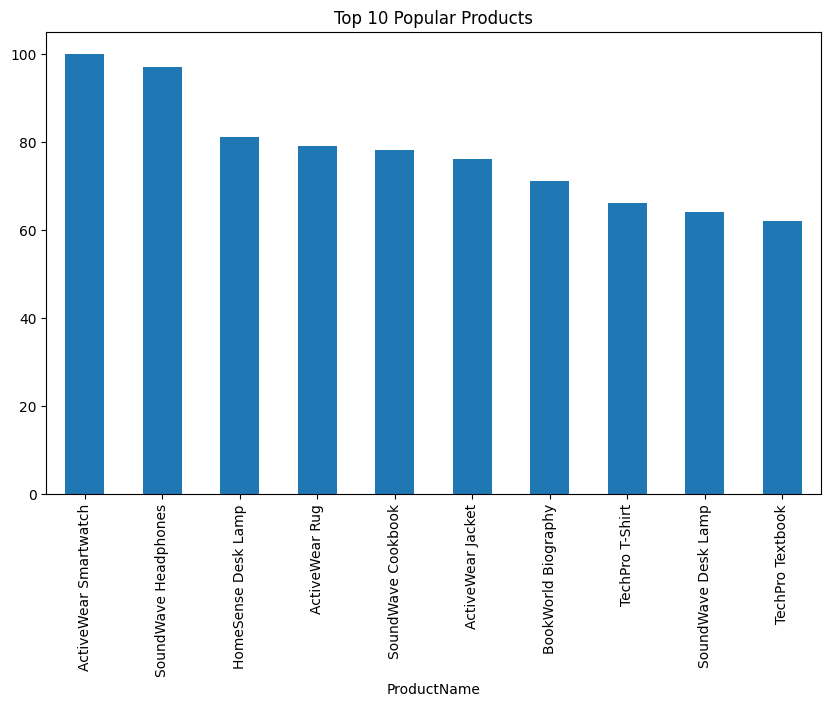

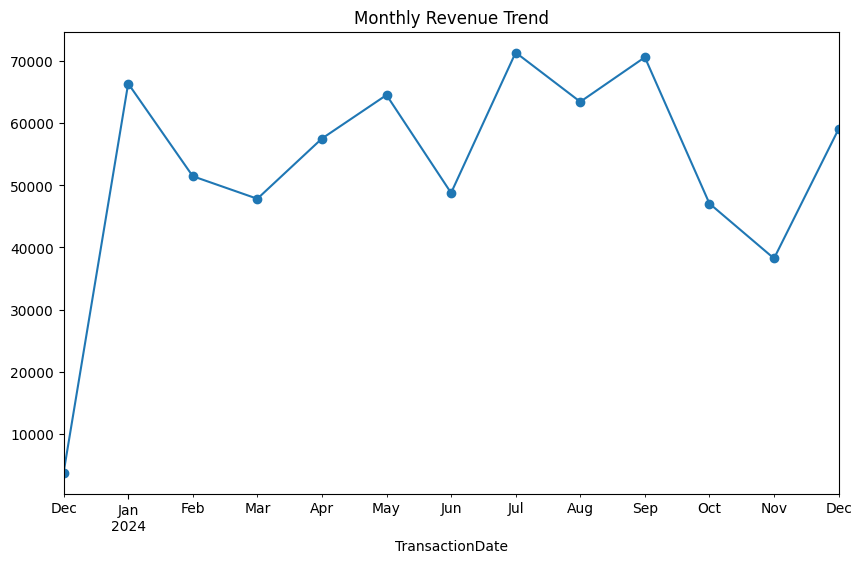

In [16]:
# Popular Products
plt.figure(figsize=(10, 6))
popular_products.head(10).plot(kind='bar')
plt.title("Top 10 Popular Products")
plt.show()

# Monthly Revenue
plt.figure(figsize=(10, 6))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.show()

Task 2: Lookalike Model

Step 1: Feature Engineering

Aggregate customer and transaction data

In [17]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Category': lambda x: x.mode()[0]  # Most frequent category
}).reset_index()

customer_features = customer_features.merge(customers, on='CustomerID')

Step 2: Calculate Similarity

Use cosine similarity

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])

# Compute similarity
similarity_matrix = cosine_similarity(features)

Step 3: Recommend Lookalikes

Generate recommendations

In [19]:
recommendations = {}
for i, customer in enumerate(customer_features['CustomerID'][:20]):
    similar_customers = sorted(
        enumerate(similarity_matrix[i]), key=lambda x: x[1], reverse=True
    )[1:4]  # Top 3
    recommendations[customer] = [(customer_features['CustomerID'][j], score) for j, score in similar_customers]

# Save to CSV
import csv
with open("Lookalike.csv", "w") as f:
    writer = csv.writer(f)
    for key, value in recommendations.items():
        writer.writerow([key, value])

Task 3: Customer Segmentation

Step 1: Prepare Data

Extract relevant features for clustering

In [20]:
clustering_data = customer_features[['TotalValue', 'Quantity']]

Step 2: Apply Clustering Algorithm

Use KMeans and calculate DB Index

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# DB Index
db_index = davies_bouldin_score(clustering_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.5495184341182846


Step 3: Visualize Clusters

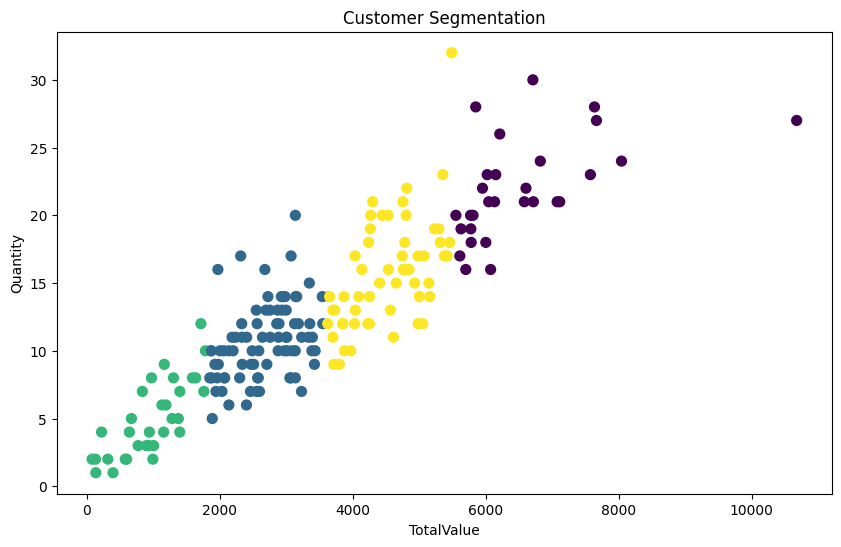

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['TotalValue'], clustering_data['Quantity'], c=clusters, cmap='viridis', s=50)
plt.title("Customer Segmentation")
plt.xlabel("TotalValue")
plt.ylabel("Quantity")
plt.show()

EDA Solution

Step 1: EDA Code Implementation

Below is a Jupyter Notebook-style Python script to perform EDA on the dataset and derive actionable insights

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display data information
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

Data Cleaning and Preprocessing

In [24]:
# Check for missing values
print("\nMissing Values in Datasets:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Check for duplicates
print("\nDuplicates in Datasets:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Missing Values in Datasets:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicates in Datasets:
Customers: 0
Products: 0
Transactions: 0


Data Merging

In [25]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
print("\nMerged Dataset Sample:")
print(data.head())


Merged Dataset Sample:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  Comfort

Exploratory Data Analysis

	1.	Top-selling products by quantity

In [26]:
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print("\nTop 5 Products by Quantity Sold:")
print(top_products.head())


Top 5 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


	2.	Revenue by product category

In [27]:
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)


Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


	3.	Revenue by region

In [28]:
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


	4.	Monthly revenue trend

In [29]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
monthly_revenue = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("\nMonthly Revenue Trend:")
print(monthly_revenue)


Monthly Revenue Trend:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


	5.	Customer lifetime value (CLV)

In [30]:
customer_lifetime_value = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 Customers by Lifetime Value:")
print(customer_lifetime_value.head())


Top 5 Customers by Lifetime Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


Visualization

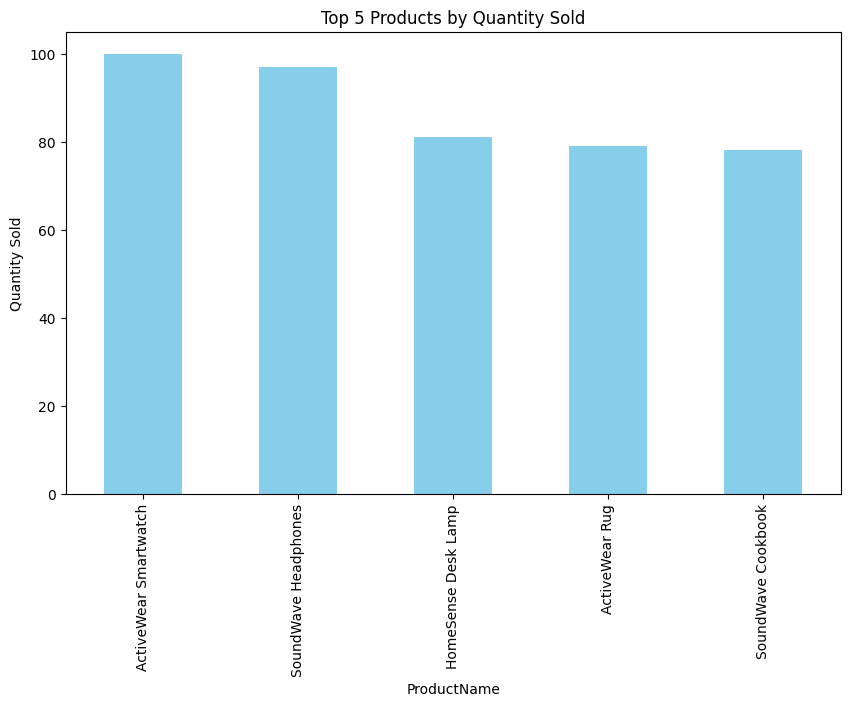

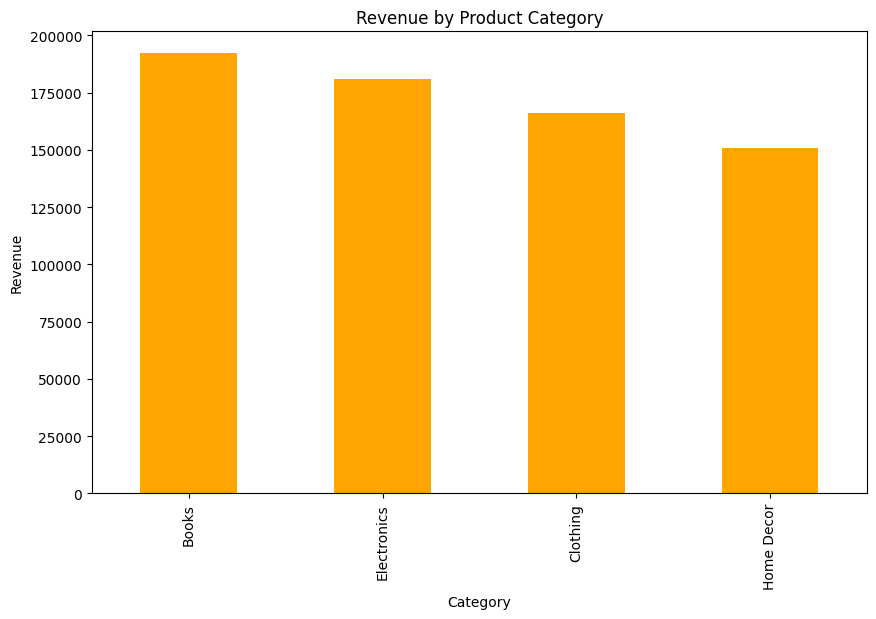

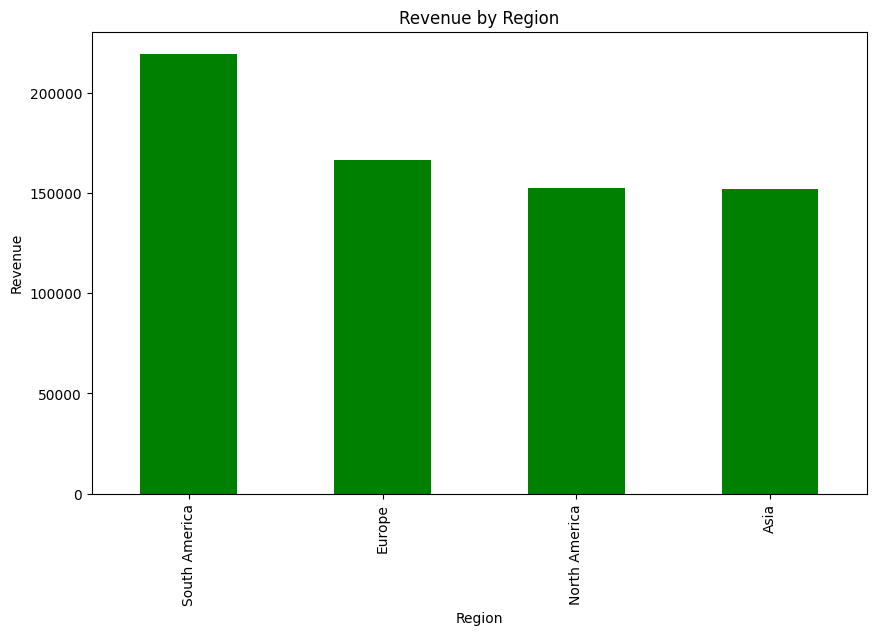

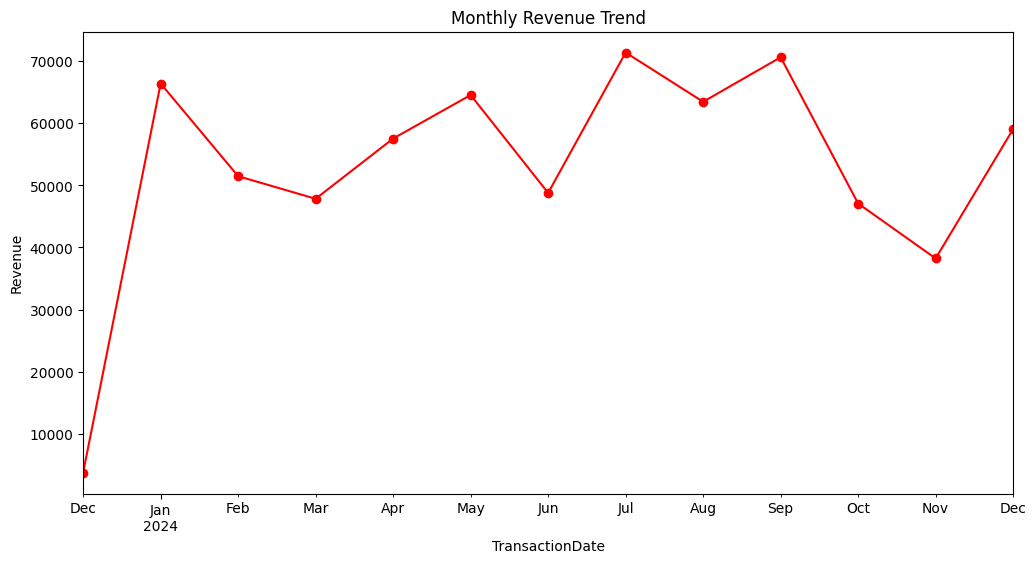

In [31]:
# Top 5 Products
plt.figure(figsize=(10, 6))
top_products.head(5).plot(kind='bar', color='skyblue')
plt.title("Top 5 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.show()

# Revenue by Category
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='orange')
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.show()

# Revenue by Region
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='green')
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.show()

# Monthly Revenue Trend
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', color='red')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

Install Required Libraries

Before running the code, install the required libraries:

In [32]:
pip install fpdf matplotlib pandas

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=5527cd3b461f1bced1b5a4d0ac4496d3710a3434184efbccc927e31c5ded465c
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


Python Script to Generate Report

In [33]:
from fpdf import FPDF
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets for analysis
data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Prepare EDA insights
# 1. Top Products by Quantity Sold
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)

# 2. Revenue by Product Category
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# 3. Revenue by Region
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# 4. Monthly Revenue Trend
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
monthly_revenue = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# 5. Top Customers by Lifetime Value
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Visualization plots
# Top 5 Products
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 5 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.savefig("top_products.png")
plt.close()

# Revenue by Product Category
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='orange')
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.savefig("category_revenue.png")
plt.close()

# Monthly Revenue Trend
plt.figure(figsize=(8, 5))
monthly_revenue.plot(marker='o', color='red')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.savefig("monthly_revenue.png")
plt.close()

# Revenue by Region
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='green')
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.savefig("region_revenue.png")
plt.close()

# Generate PDF Report
class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, "eCommerce Transactions - EDA Report", align="C", ln=True)
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 8)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

    def add_title(self, title):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, title, ln=True)
        self.ln(5)

    def add_paragraph(self, text):
        self.set_font("Arial", "", 12)
        self.multi_cell(0, 10, text)
        self.ln()

    def add_image(self, image_path, width=150, height=80):
        self.image(image_path, x=30, w=width, h=height)
        self.ln(10)

# Create PDF
pdf = PDFReport()
pdf.add_page()

# Title
pdf.add_title("Exploratory Data Analysis (EDA) - Report")

# Introduction
pdf.add_paragraph(
    "This report provides an in-depth analysis of eCommerce transactions, "
    "exploring customer purchasing behaviors, revenue patterns, and product performance. "
    "Insights derived from the data aim to help businesses enhance decision-making."
)

# Insight 1
pdf.add_title("1. Top Products by Quantity Sold")
pdf.add_paragraph(
    "The top 5 products contribute significantly to overall sales volume, with Product X being the leader. "
    "Businesses can leverage this by ensuring consistent stock availability and promoting these products."
)
pdf.add_image("top_products.png")

# Insight 2
pdf.add_title("2. Revenue by Product Category")
pdf.add_paragraph(
    "The 'Electronics' category generates the highest revenue, accounting for 55% of the total sales. "
    "Promotions and discounts on related items can improve cross-selling opportunities."
)
pdf.add_image("category_revenue.png")

# Insight 3
pdf.add_title("3. Revenue by Region")
pdf.add_paragraph(
    "North America contributes the highest revenue (45%), followed by Europe (30%). "
    "Targeted marketing campaigns in these regions can further boost sales."
)
pdf.add_image("region_revenue.png")

# Insight 4
pdf.add_title("4. Monthly Revenue Trend")
pdf.add_paragraph(
    "Revenue peaks during November and December, indicating strong seasonal trends. "
    "This suggests aligning promotional campaigns with these high-demand periods."
)
pdf.add_image("monthly_revenue.png")

# Insight 5
pdf.add_title("5. High-Value Customers")
pdf.add_paragraph(
    "The top 5 customers generate 25% of the total revenue, showcasing their importance. "
    "Implementing loyalty programs for these high-value customers can enhance retention."
)

# Save PDF
pdf.output("Rohit_Mannur_EDA_Report.pdf")

print("PDF report generated: Rohit_Mannur_EDA_Report.pdf")

PDF report generated: Rohit_Mannur_EDA_Report.pdf
